<a href="https://colab.research.google.com/github/sankeerthana2000/hello-world/blob/master/sankeerthana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchsummary

from tqdm.notebook import tqdm

from torch.utils.tensorboard import SummaryWriter
import os

%load_ext tensorboard

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [0]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
train = datasets.CIFAR100(train=True, 
                                transform=preprocess, 
                                download=True, 
                                root='./data')

test = datasets.CIFAR100(train=False, 
                                transform=preprocess, 
                                download=True, 
                                root='./data')

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
classes = train.classes
print(len(classes))
print(classes)

100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tr

In [0]:
train_loader = DataLoader(
    train,
    batch_size=8,
    shuffle=True,
    num_workers=4
    )

test_loader = DataLoader(
    test,
    batch_size=8,
    shuffle=False,
    num_workers=4
    )

In [0]:
def showimgs(imgs, title):
  imgs = imgs.cpu()
  mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
  std = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)

  imgs = imgs*std+mean
  img_grid =torchvision.utils.make_grid(imgs, nrow=4)
  img_np = img_grid.numpy()
  img_np = np.transpose(img_np, (1,2,0))

  plt.figure(figsize=(8,4))
  plt.imshow(img_np)
  plt.title(title)
  plt.show()

Training Example


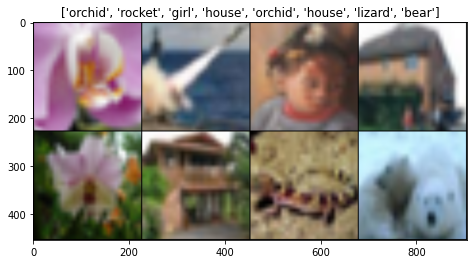

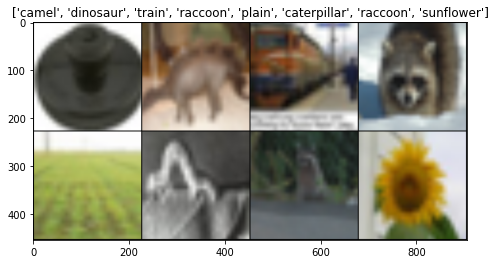

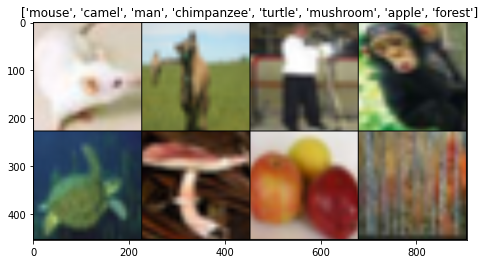

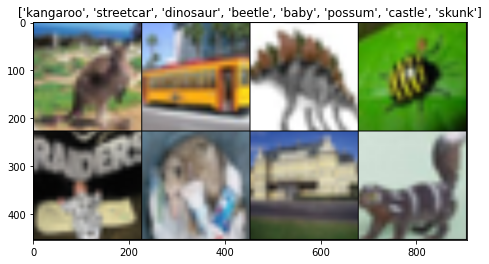

In [9]:
print('Training Example')
for i, batch in enumerate(train_loader):
  if i == 4:
    break
  images, labels = batch
  showimgs(images, str([classes[i] for i in labels])) 

Training Example


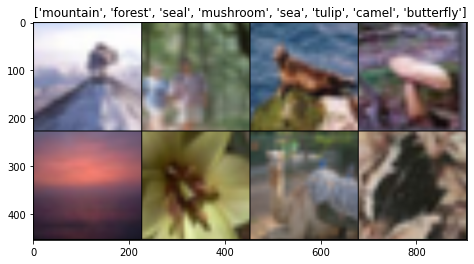

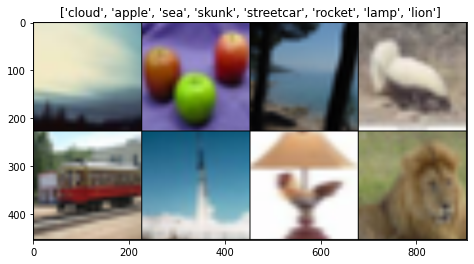

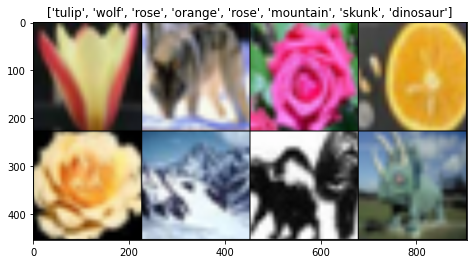

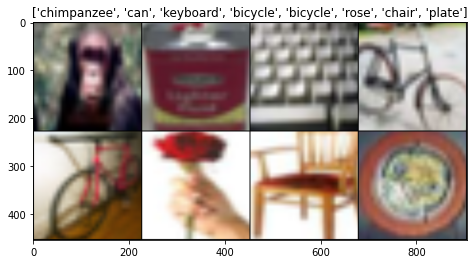

In [10]:
print('Training Example')
for i, batch in enumerate(test_loader):
  if i == 4:
    break
  images, labels = batch
  showimgs(images, str([classes[i] for i in labels])) 

In [11]:
model = torchvision.models.resnet18(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
torchsummary.summary(model.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [0]:
for param in model.parameters():
  param.requires_grad = False

In [0]:
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 100)

In [15]:
for param in model.parameters():
  if param.requires_grad == True:
    print(param.size())

torch.Size([100, 512])
torch.Size([100])


In [0]:
def unnormalize(images):
    mean=torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
    std=torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)

    images = images * std + mean
    return images

def show_images(images, labels):
    images = unnormalize(images).numpy()

    fig = plt.figure(figsize=(10,8))
    for i in range(8):
        ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
        image = np.transpose(images[i], (1,2,0))
        plt.imshow(image)
        ax.set_title(classes[labels[i]])

    return fig

In [0]:
if os.path.isdir('runs'):
    !rm -rf runs

writer = SummaryWriter('runs/cifar100-exp1')
writer.close()

In [0]:
def images_to_probs(net, images):
    
    output = net(images).cpu()
    
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

In [0]:
def evaluate(net, dataloader):
    correct, total = 0, 0
    with torch.no_grad():
        model.eval()
        for images, labels in dataloader:
            images, labels = images.to(device), labels.numpy()

            preds, probs = images_to_probs(net, images)

            total += len(labels)
            correct += (preds == labels).sum()
    return correct/total * 100

def train(net, loss_fn, opt, train_loader, test_loader, writer, epochs):
    num_steps = 0
    min_loss = 1e+10

    if os.path.isdir('checkpoints'):
        !rm -rf checkpoints/
    os.mkdir('checkpoints')

    for epoch in tqdm(range(1, epochs+1), total=epochs, desc='Training'):
        running_loss = []
        net.train() 
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            num_steps += 1

            outs = net(images)
            loss = loss_fn(outs, labels)

            running_loss.append(loss.item())
            writer.add_scalar('Step Loss', loss.item(), num_steps)

            opt.zero_grad()
            loss.backward()
            opt.step()

            del images, labels, outs
            torch.cuda.empty_cache()
        
        epoch_loss = sum(running_loss) / len(running_loss)
        train_acc = evaluate(net, train_loader)
        test_acc = evaluate(net, test_loader)
        writer.add_scalar('Epoch Loss', epoch_loss, epoch)
        writer.add_scalars('Accuracies', 
                           {'Train Accuracy': train_acc, 
                            'Test Accuracy': test_acc}, epoch)

        
        if epoch_loss < min_loss:
            min_loss = epoch_loss
            torch.save(net.state_dict(), 
                       'checkpoints/model_E{:03d}_L{:.2f}.pt'.format(epoch, min_loss))
            writer.add_scalar('Checkpoint', min_loss, epoch)

    print('Training finished!!!')


In [0]:
def get_resnet():
    model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
    
    for param in model.parameters():
        param.requires_grad = False

    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, 100)

    return model.to(device)

In [21]:
%reload_ext tensorboard
%tensorboard --logdir runs

import torch.optim as optim

model = get_resnet()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.0001)

if os.path.isdir('runs/ResNet-training-exp1'):
    !rm -rf runs/ResNet-training-exp1

writer = SummaryWriter('runs/ResNet-training-exp1')
train(model, loss_fn, opt, train_loader, test_loader, writer, 20)
writer.close()

<IPython.core.display.Javascript object>

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



Training finished!!!
